In [143]:
#4.3.1 Introduction to Network Analysis
#4.3.2 Basics of Networkx
import networkx as nx
G=nx.Graph()

In [144]:
G.add_node(1)
G.add_nodes_from([2,3])

In [145]:
G.add_nodes_from(["u","v"])
G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [146]:
G.add_edge(1,2)

In [147]:
G.add_edge("u","v")

In [148]:
G.add_edges_from([(1,3),(1,4),(1,5),(1,6)])
G.add_edge("u","w")

In [149]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [150]:
G.remove_node(2)

In [151]:
G.remove_nodes_from([4,5])

In [152]:
G.nodes()

NodeView((1, 3, 'u', 'v', 6, 'w'))

In [153]:
G.remove_edge(1,3)

In [154]:
G.edges()

EdgeView([(1, 6), ('u', 'v'), ('u', 'w')])

In [155]:
G.remove_edges_from([(1,2),("u","w")])

In [156]:
G.edges()

EdgeView([(1, 6), ('u', 'v')])

In [157]:
G.number_of_nodes()

6

In [158]:
G.number_of_edges()

2

In [159]:
#in between exercise:
G = nx.Graph()
G.add_nodes_from(1,2,3,4)
G.add_edges_from((1,2),(3,4))
G.number_of_nodes(), G.number_of_edges()

TypeError: add_nodes_from() takes 2 positional arguments but 5 were given

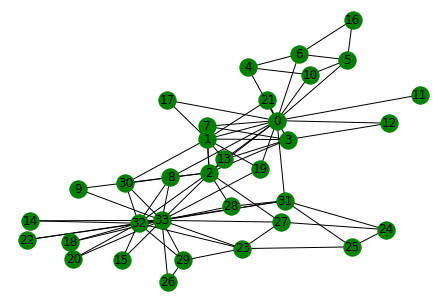

In [160]:
#4.3.3 Graph Visualization

G=nx.karate_club_graph()
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True, node_color="green", edge_color="black")
plt.savefig("karate_club_graph.pdf")

In [161]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [162]:
G.degree()[33]

17

In [163]:
G.degree(33)

17

In [164]:
G.degree(0) is G.degree()[0]

True

In [165]:
#4.3.4 Random Graph
from scipy.stats import bernoulli
bernoulli.rvs(p=0.2)

1

In [166]:
N=20
p=0.2
#create empty graph
#add all N nodes in the graph
#loop over all pairs of nodes
    #add an edge with prob p

In [167]:
def er_graph(N,p):
    """Generating an ER Graph"""
    G=nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1< node2 and bernoulli.rvs(p=p):
                G.add_edge(node1,node2)
    return G

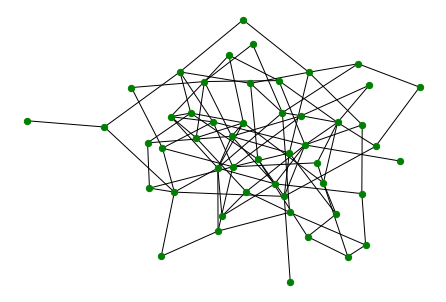

In [168]:
nx.draw(er_graph(50,0.08), node_size=40, node_color="green")
plt.savefig("er1.pdf")

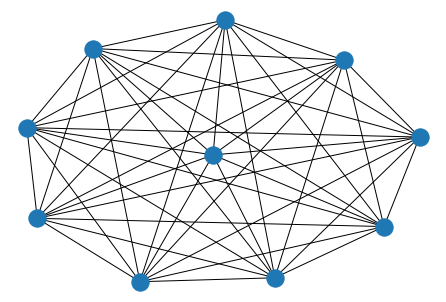

In [169]:
l=nx.erdos_renyi_graph(10,1) 
nx.draw(l)

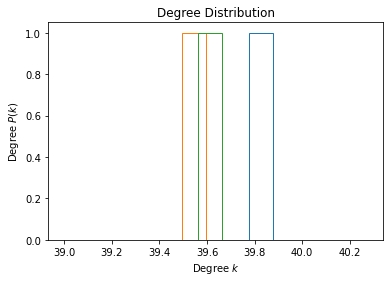

In [170]:
#4.3.5 plotting the degree distribution

def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(np.mean(degree_sequence), histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("Degree $P(k)$")
    plt.title("Degree Distribution")
G1=er_graph(500,0.08)
plot_degree_distribution(G1)
G2=er_graph(500,0.08)
plot_degree_distribution(G2)
G3=er_graph(500,0.08)
plot_degree_distribution(G3)
plt.savefig("hist3.pdf")

In [172]:
# 4.3.6 Descriptive Statistics of Empirical Social Networks
import numpy as np
A1=np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2=np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")

In [173]:
G1=nx.to_networkx_graph(A1)
G2=nx.to_networkx_graph(A2)

In [174]:
def basic_net_stats(G):
    print("Number of nodes: %d" % G.number_of_nodes())
    print("Number of edges: %d" % G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))

In [175]:
basic_net_stats(G1)


Number of nodes: 843
Number of edges: 3405
Average degree: 8.08


In [176]:
basic_net_stats(G2)

Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


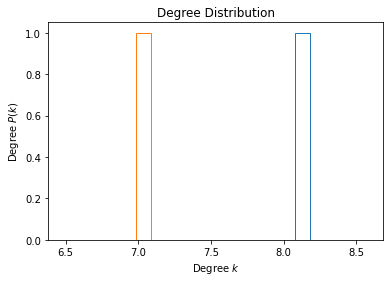

In [177]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.savefig("Village_hist.pdf")

In [178]:
#4.3.7 Finding the Largest Connected Components
gen=(G1.subgraph(c).copy() for c in nx.connected_components(G1))
g=gen.__next__()
type(g)

networkx.classes.graph.Graph

In [179]:
g.number_of_nodes()

825

In [180]:
len(gen.__next__())

3

In [181]:
len(G1)

843

In [184]:
G1_LCC=max((G1.subgraph(c).copy() for c in nx.connected_components(G1)), key=len)
G2_LCC=max((G2.subgraph(c).copy() for c in nx.connected_components(G2)), key=len)

In [188]:
len(G1_LCC)

825

In [191]:
G1_LCC.number_of_nodes()

825

In [192]:
len(G2_LCC)

810

In [194]:
G1_LCC.number_of_nodes()/G1.number_of_nodes()

0.9786476868327402

In [196]:
G2_LCC.number_of_nodes()/G2.number_of_nodes()

0.9236031927023945

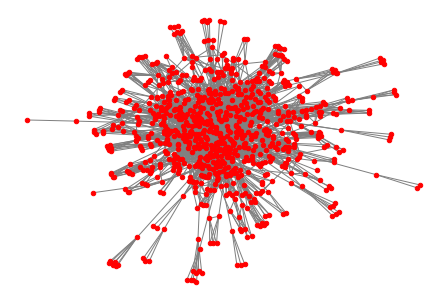

In [197]:
plt.figure()
nx.draw(G1_LCC,node_color="red", edge_color="grey",node_size=20)
plt.savefig("village1.pdf")

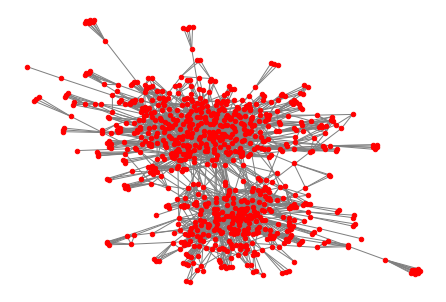

In [199]:
plt.figure()
nx.draw(G2_LCC,node_color="red", edge_color="grey",node_size=20)
plt.savefig("village2.pdf")

In [204]:
G1.number_of_nodes()

843

In [205]:
G2.number_of_nodes()

877